In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv(r"gender_classification_v7.csv.xls")
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [48]:
for i in data:
    data=data.rename(columns={i:i.capitalize()})
data

,Long_hair,Forehead_width_cm,Forehead_height_cm,Nose_wide,Nose_long,Lips_thin,Distance_nose_to_lip_long,Gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [49]:
data.describe()

,Long_hair,Forehead_width_cm,Forehead_height_cm,Nose_wide,Nose_long,Lips_thin,Distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Long_hair                  5001 non-null   int64  
 1   Forehead_width_cm          5001 non-null   float64
 2   Forehead_height_cm         5001 non-null   float64
 3   Nose_wide                  5001 non-null   int64  
 4   Nose_long                  5001 non-null   int64  
 5   Lips_thin                  5001 non-null   int64  
 6   Distance_nose_to_lip_long  5001 non-null   int64  
 7   Gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [51]:
aa=data[(data['Gender']=='Male')]
ab=data[(data['Gender']=='Female')]

In [52]:
G_count=data.groupby('Gender') ['Gender'].count()
G_count

Gender
Female    2501
Male      2500
Name: Gender, dtype: int64

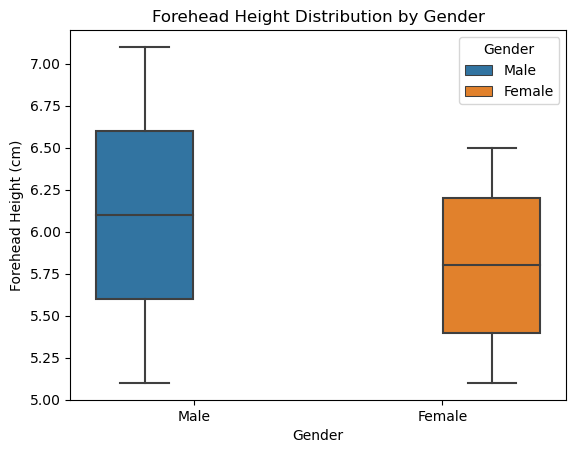

In [53]:
sns.boxplot(x='Gender', y='Forehead_height_cm', data=data, hue='Gender')

# Customize the plot (optional)
plt.title('Forehead Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Forehead Height (cm)')
plt.show()

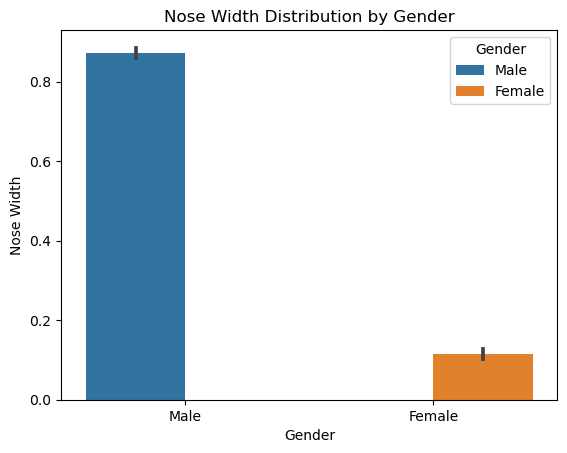

In [54]:
sns.barplot(x='Gender', y='Nose_wide', data=data, hue='Gender')

# Customize the plot (optional)
plt.title('Nose Width Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Nose Width')
plt.show()

##### *KNN Algorithm*

In [55]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [56]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [57]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)


In [58]:

from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
print(y_pred)
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy: %.2f' % (accuracy*100))

['Female' 'Male' 'Male' ... 'Male' 'Male' 'Male']
Accuracy: 96.24


#### *Decision Tree Algorithm*

In [59]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [60]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [61]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)

In [62]:

from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 
classifier.fit(x_train, y_train)
#Predicting the test set result
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy: %.2f' % (accuracy*100))

['Female' 'Male' 'Male' ... 'Male' 'Male' 'Male']
Accuracy: 96.08


### *RANDOM TREE ALGORITHM*

In [63]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [65]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)


In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

['Female' 'Male' 'Male' ... 'Female' 'Male' 'Female']
Accuracy: 96.40


#### *Suport vector machine learning(SVM) Algorithm*

In [67]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)



In [69]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)


In [70]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

['Female' 'Male' 'Male' ... 'Female' 'Male' 'Female']
Accuracy: 96.20


#### *Logistics regression Algorithm*

In [71]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]



In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [73]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)


In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :%.2f' % (accuracy*100))

['Female' 'Male' 'Male' ... 'Female' 'Male' 'Female']
Accuracy :96.10


#### *Naive Bayes classifier Algorithm*

In [75]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [77]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)


In [78]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :%.2f' % (accuracy*100))

['Female' 'Male' 'Male' ... 'Female' 'Male' 'Female']
Accuracy :96.10


#### *HyperParameter Tuning*

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Comparing the models with default hyperparameter values using cross Validation 

In [80]:
x=data.iloc[:,0:-1]
y=y=data.iloc[:,-1]
x=np.asarray(x)
y=np.asarray(y)
model=[LogisticRegression(max_iter=1000), SVC(kernel='linear'), RandomForestClassifier(random_state=0), KNeighborsClassifier(metric='minkowski')]

def Com_mo_val():
    for i in model:
        
        Cv_score=cross_val_score(i,x,y,cv=5)
        mean_accu=sum(Cv_score)/len(Cv_score)
        mean_accu=mean_accu*100
        mean_accu=round(mean_accu,2)

        print('cross validation accuracies for the ', i,'=',Cv_score)
        print('Acurracy scofre of the ', i,'=',mean_accu,'%')
        print('-----------------------------------------------')

In [81]:
Com_mo_val()

cross validation accuracies for the  LogisticRegression(max_iter=1000) = [0.96103896 0.961      0.976      0.967      0.976     ]
Acurracy scofre of the  LogisticRegression(max_iter=1000) = 96.82 %
-----------------------------------------------
cross validation accuracies for the  SVC(kernel='linear') = [0.96403596 0.96       0.976      0.966      0.973     ]
Acurracy scofre of the  SVC(kernel='linear') = 96.78 %
-----------------------------------------------
cross validation accuracies for the  RandomForestClassifier(random_state=0) = [0.95604396 0.967      0.978      0.971      0.977     ]
Acurracy scofre of the  RandomForestClassifier(random_state=0) = 96.98 %
-----------------------------------------------
cross validation accuracies for the  KNeighborsClassifier() = [0.95604396 0.958      0.976      0.963      0.974     ]
Acurracy scofre of the  KNeighborsClassifier() = 96.54 %
-----------------------------------------------


For the gender classification data, Random forest classifier has the Highest accuracy value with default hyperparameter values.

Comparing the models with different Hyperparameter values using GridsearchCV

In [82]:
model_list=[LogisticRegression(max_iter=10000), SVC(),
            KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

#Creating s dictionary that contains hyperparameter values for the above mentioned models
Mo_hyper={
    'Log_reg_hyper':{
        'C':[1,5,10,20]
    },
    'SVC_hyper':{
        
        'kernel':['linear','poly','rbf','sigmoid'],
         'C':[1,5,10,20]
    },
    'KNN_hyper':{
        'n_neighbors':[3,5,10]
        
        
    },
    'Ran_for_hyper':{
        'criterion':['gini', 'entropy', 'log_loss'],
         'n_estimators':[10,20,40,60]
    }
         
}
Model_keys=list(Mo_hyper.keys())



Applying GridSearchCV

In [83]:
def Modelselect(List_model, Hyper_dict):
    result=[]
    i=0
    for model in List_model:
        key=Model_keys[i]
        params=Hyper_dict[key]
        i+=1
        print(model)
        print(params)
        print('-----------------------------')

        classifier=GridSearchCV(model,params,cv=5)
        classifier.fit(x,y)
        result.append({
            "model used":model,
            "highest score":classifier.best_score_,
            "Best hyperparameter":classifier.best_params_
        })
    result_df=pd.DataFrame(result,columns=['model used','highest score','Best hyperparameter'])   
    return result_df

In [84]:
Modelselect(model_list,Mo_hyper)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
-----------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
-----------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
-----------------------------
RandomForestClassifier(random_state=0)
{'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [10, 20, 40, 60]}
-----------------------------


,model used,highest score,Best hyperparameter
0,LogisticRegression(max_iter=10000),0.968208,{'C': 1}
1,SVC(),0.970407,"{'C': 20, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.967809,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.971408,"{'criterion': 'gini', 'n_estimators': 20}"


Random Forest Classifier with n_estimators=20 have the maximum accurrecy.

In [85]:
#Doing with test and train data with random forest classifier with n_eliminators=20 and criterion with gini

x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [90]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)


In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 20, criterion="gini")
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % (accuracy*100))

['Female' 'Male' 'Male' ... 'Female' 'Male' 'Female']
Accuracy: 96.50
